In [13]:
import pandas as pd
import analysis_utils as au
import matplotlib.pyplot as plt
import numpy as np

In [14]:
df_exp = pd.read_csv('experimental_data/geballe_heat_data.csv')

In [15]:
for x in np.linspace(3.8-0.5, 3.8+0.5, 11):
    print(x)

3.3
3.4
3.5
3.5999999999999996
3.6999999999999997
3.8
3.9
4.0
4.1
4.2
4.3


/tmp/ipykernel_148282/2670682228.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis')       # or 'plasma', 'tab10', etc.


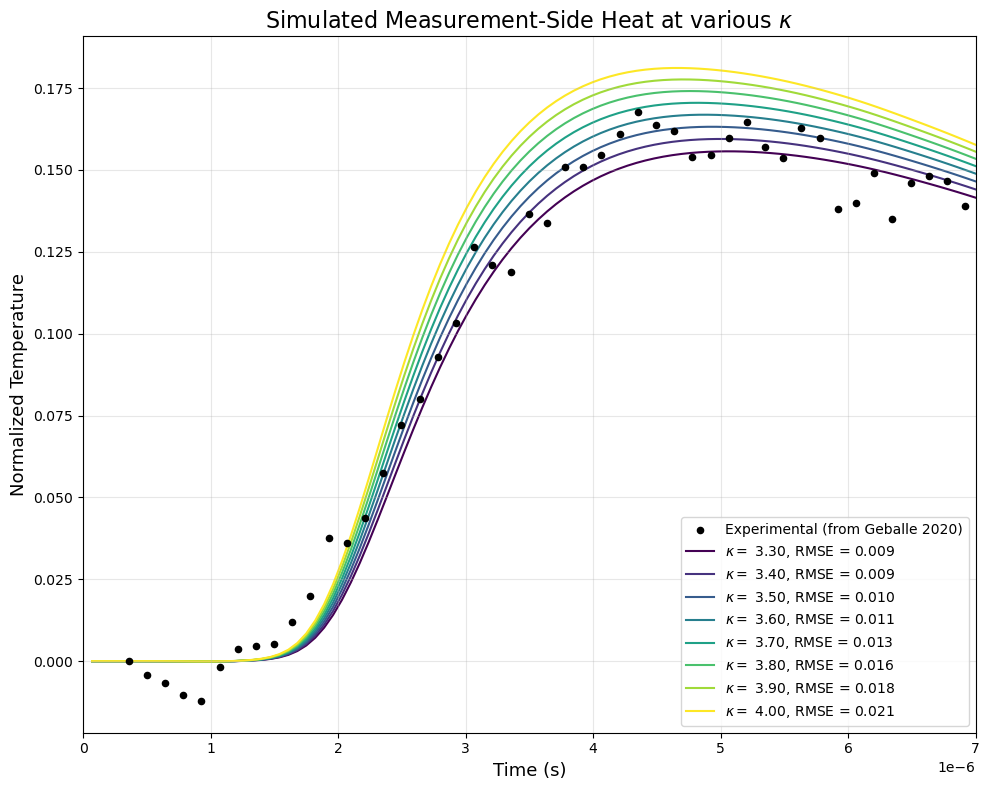

In [17]:
import matplotlib.cm as cm  
from cycler import cycler

# Choose a colormap and sample N colors from it
cmap = cm.get_cmap('viridis')       # or 'plasma', 'tab10', etc.
N = 8                               # number of lines / distinct colors
colors = [cmap(i / (N - 1)) for i in range(N)]

# Set the color cycle
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

df_rmse = pd.read_csv('outputs/sweep_test/rmse_summary.csv')

# Normalize experimental data
exp_pside_normed = (df_exp['temp'] - df_exp['temp'].iloc[0]) / (df_exp['temp'].max() - df_exp['temp'].min())
exp_time = df_exp['time']

# Downshift experimental oside to start from ic_temp and normalize
ic_temp = 300
oside_initial = df_exp['oside'].iloc[0]
exp_oside_shifted = df_exp['oside'] - oside_initial + ic_temp
exp_oside_normed = (exp_oside_shifted - exp_oside_shifted.iloc[0]) / (df_exp['temp'].max() - df_exp['temp'].min())

fig, ax = plt.subplots(figsize = (10, 8))

# Plot experimental data
#ax.plot(exp_time, exp_pside_normed, color='gray', label='Experimental pulsed side')
ax.scatter(exp_time, exp_oside_normed, color='black', label='Experimental (from Geballe 2020)', s=20, zorder =2)

# plot sim data:    
for k in np.linspace(3.8-0.5, 4.0, 8):
    df_sim = pd.read_csv(f'outputs/sweep_test/{k:.2f}/watcher_points.csv')
    sim_oside_normed = (df_sim['oside'] - df_sim['oside'].iloc[0]) / (df_sim['pside'].max() - df_sim['pside'].min())

    rmse = round(df_rmse.loc[df_rmse['k'] == float(f'{k:.2f}'), 'rmse'].values[0], 4)
    ax.plot(df_sim['time'], sim_oside_normed, 
            zorder = 1,
            label=r'$\kappa=$' + f' {k:.2f}, RMSE = {rmse:.3f}')

ax.grid(True, alpha = 0.3)
ax.legend(loc='lower right')

ax.set_ylabel('Normalized Temperature', fontsize=13)
ax.set_xlabel('Time (s)', fontsize=13)

ax.set_xlim(0, 7e-6)
ax.set_title(r'Simulated Measurement-Side Heat at various $\kappa$', fontsize=16)
plt.tight_layout()
plt.show()

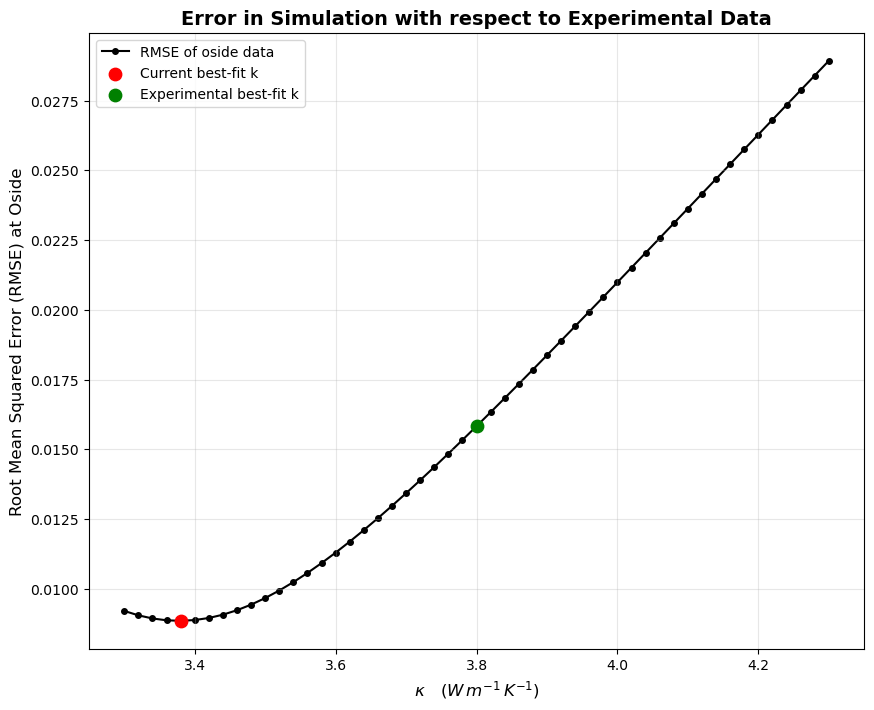

In [ ]:
df_rmse = pd.read_csv('outputs/sweep_test/rmse_summary.csv')
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(df_rmse['k'], df_rmse['rmse'], color='black', marker='o', markersize=4, zorder = 1, label='RMSE of oside data')
ax.scatter(df_rmse.loc[df_rmse['k'] == 3.38]['k'], df_rmse.loc[df_rmse['k'] == 3.38]['rmse'], color='red', zorder=2, s=80, label='Current best-fit k')
ax.scatter(df_rmse.loc[df_rmse['k'] == 3.8]['k'], df_rmse.loc[df_rmse['k'] == 3.8]['rmse'], color='green', zorder=2, s=80, label='Experimental best-fit k')

ax.grid(True, alpha = 0.3)
ax.legend()
ax.set_ylabel('Root Mean Squared Error (RMSE) at Oside', fontsize=12)
ax.set_xlabel(r'$\kappa\quad(W\,m^{-1}\,K^{-1}$)', fontsize = 12)
ax.set_title('Error in Simulation with respect to Experimental Data', fontsize = 14, fontweight = 'bold')
plt.show()

/tmp/ipykernel_148282/2407412028.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')


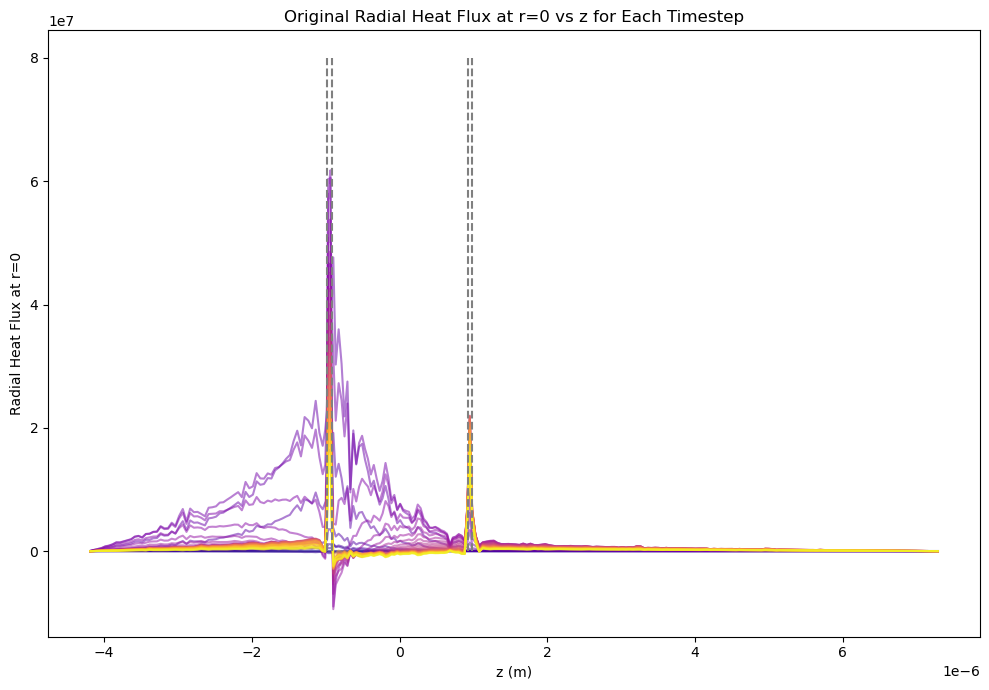

TypeError: cannot unpack non-iterable float object

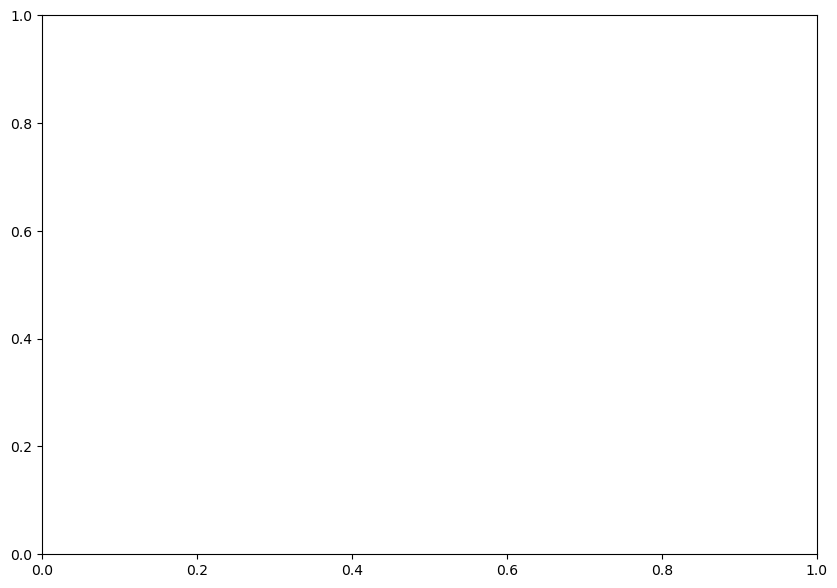

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from cycler import cycler

# --- Load the radial flux data ---
df_flux = pd.read_csv('outputs/geballe_no_diamond_read_flux/radial_flux_r0.csv')  # <-- update path as needed
z_cols = [col for col in df_flux.columns if col != 'time']
z_vals = np.array([float(z) for z in z_cols])
sim_times = df_flux['time'].to_numpy()

# --- Load and normalize the experimental heating data ---
df_exp = pd.read_csv('experimental_data/geballe_heat_data.csv')
exp_times = df_exp['time'].to_numpy()
exp_temps = df_exp['temp'].to_numpy()
# Normalize to [0, 1]
exp_temps_norm = (exp_temps - exp_temps.min()) / (exp_temps.max() - exp_temps.min())

# --- Interpolate normalized heating to simulation times ---
heating_interp = np.interp(sim_times, exp_times, exp_temps_norm)

# --- Prepare color map ---
cmap = cm.get_cmap('plasma')
N = len(sim_times)
colors = [cmap(i / (N - 1)) for i in range(N)]
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)


# --- Plot original flux profiles ---
fig, ax = plt.subplots(figsize=(10, 7))
for i, row in df_flux.iterrows():
    ax.plot(z_vals, row[z_cols], label=f't={row["time"]:.2e}s', alpha=0.5)
ax.vlines([-9.82e-7, -9.2e-7, 9.2e-7, 9.82e-7], 0, 8e7, color='gray', linestyles='--')
ax.set_xlabel('z (m)')
ax.set_ylabel('Radial Heat Flux at r=0')
ax.set_title('Original Radial Heat Flux at r=0 vs z for Each Timestep')
plt.tight_layout()
plt.show()

# --- Plot modulated flux profiles ---
fig, ax = plt.subplots(figsize=(10, 7))
for i, row in df_flux.iterrows():
    modulated_flux = row[z_cols] * heating_interp[i]
    ax.plot(z_vals, modulated_flux, label=f't={row["time"]:.2e}s', alpha=0.5)
ax.vlines([-9.82e-7, -9.2e-7, 9.2e-7, 9.82e-7], 0, 8e7, color='gray', linestyles='--')
ax.set_xlabel('z (m)')
ax.set_ylabel('Modulated Radial Heat Flux at r=0')
ax.set_title('Modulated Radial Heat Flux (by Experimental Heating) at r=0 vs z')
ax.legend(loc='best', fontsize=8, ncol=2)
plt.tight_layout()
plt.show() 